In [3]:
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt
import cv2
from dask.distributed import Client
from skimage.io import imread, imshow, imsave

In [4]:
# list available devices
cle.available_device_names()

['NVIDIA GeForce GTX 1650']

In [5]:
cle.get_device()

<NVIDIA GeForce GTX 1650 on Platform: NVIDIA CUDA (1 refs)>

AxesImage(507.442,52.8;18.6255x369.6)


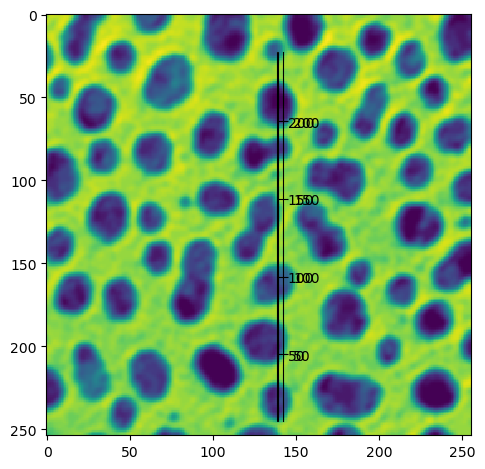

In [8]:
# define network constants
ipAddressHost = "192.168.0.117:8786"
# define image source from Internet
source = "https://imagej.nih.gov/ij/images/blobs.gif"

# define image function for calculation
def handleImage(source):
    image = imread(source)
    blurred = cle.gaussian_blur(image, sigma_x=1, sigma_y=1)
    return imshow(blurred)
    
# create client using ip addresses
client = Client(ipAddressHost)

# specify computational task
task = client.submit(handleImage, source)

# execute and print result
result = task.result()
print(result)